[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-username/your-repository/blob/main/path/to/your_notebook.ipynb)

# JOBSHEET 4 - KLASTERISASI

## Nama     : Hanif Faishal Hilmi

## Kelas    : TI 3F

### PRAKTIKUM 1

**1. Persiapan data**

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**2. Seleksi Data**

In [2]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**3. Plot Data**

Karena data 4 dimensi, maka akan kita coba plot cluster berdasarkan Sepal Length dan Sepal Width saja

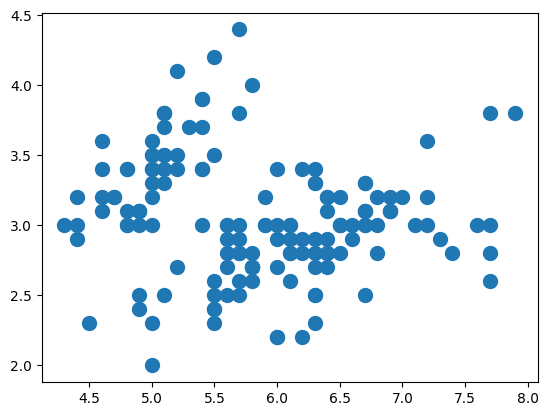

In [3]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=100)


**4. Buat Model KMeans**

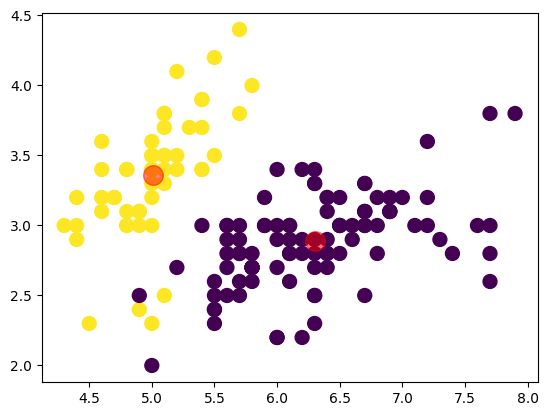

In [4]:
from sklearn.cluster import KMeans

# inisiasi objek KMeans
cl_kmeans = KMeans(n_clusters=2)

# fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# plot hasil klasterisasi berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=100, c=y_kmeans)

# plot centroids
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**5. Cek Nilai SSE**

In [5]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


**6. Implementasi Metode Elbow**

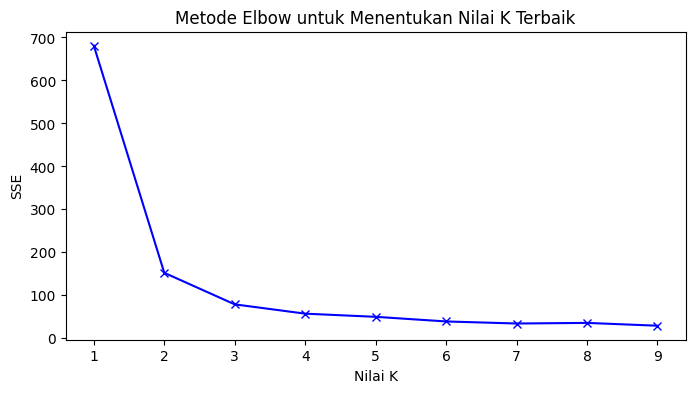

In [6]:
# List nilai SSE
sse = []

# cari k terbaik dari 1-10
K = range(1, 10)

# cek nilai SSE untuk tiap K
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

# plot nilai SSE
plt.figure(figsize=(8,4))
plt.plot(K, sse, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan Nilai K Terbaik')
plt.show()

**7. Cek Nilai SSE Setiap K**

In [7]:
for idx, sse_val in enumerate(sse):
    print(f'K={idx+1}, SSE={sse_val}')

K=1, SSE=680.8244
K=2, SSE=152.36870647733906
K=3, SSE=78.94084142614602
K=4, SSE=57.31787321428571
K=5, SSE=49.95165
K=6, SSE=39.185257692307694
K=7, SSE=34.421947665056365
K=8, SSE=35.81647575757576
K=9, SSE=29.258620414673047


### PRAKTIKUM 2

**IMPORT LIBRARY**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#### Pengantar K-Means


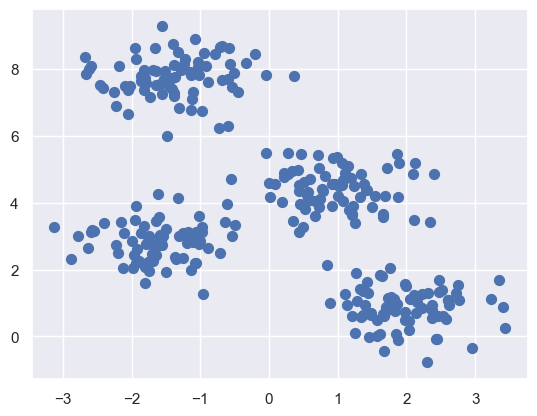

In [9]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

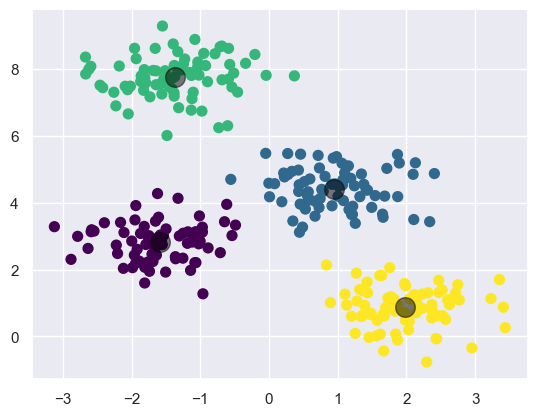

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### Algoritma Expectation-Maximization

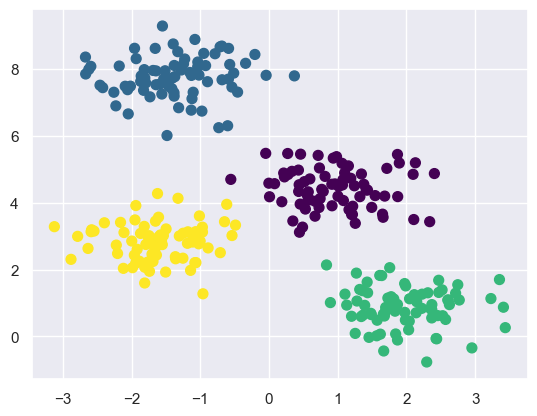

In [12]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. choose random clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap='viridis')

**Perubahan random**

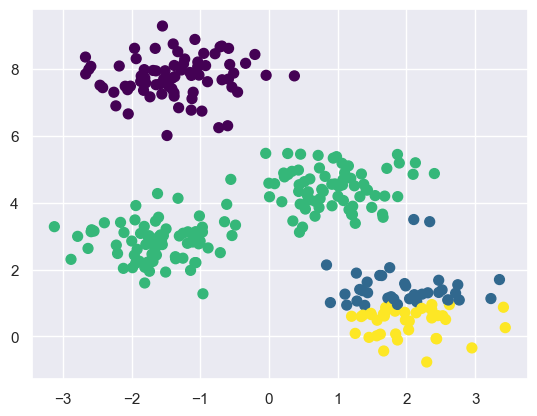

In [13]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

**Optimalisasi Jumlah Klaster**

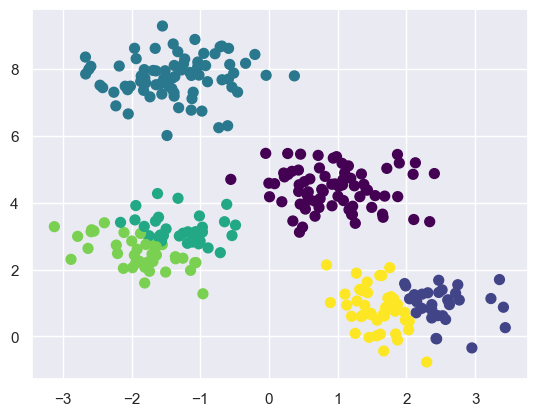

In [14]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

**Batas Klaster yang Tidak Selalu Linier**

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

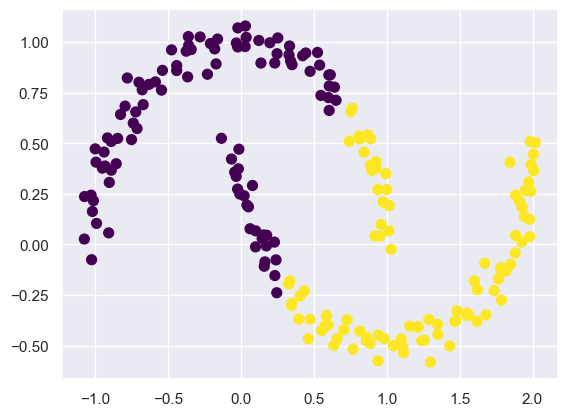

In [17]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

d:\Kuliah\MachineLearning\MachineLearning\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


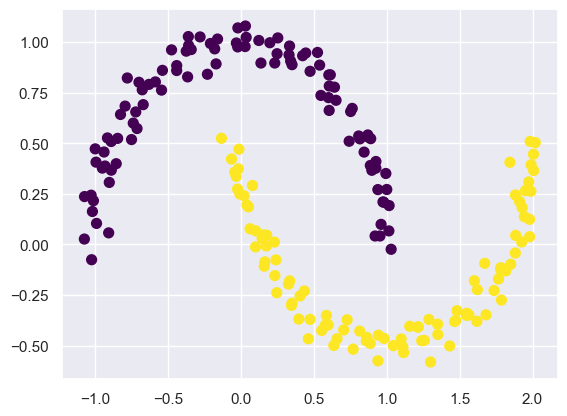

In [18]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')